## Final Model Building

- Final model
- Feature Selection using SHAP

In [1]:
# pip install optuna

In [2]:
# for EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick


# feature scaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# for fixing the imbalanced dataset and split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# for model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

# models selection 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# for the gridsearch
from sklearn.model_selection import GridSearchCV

In [3]:
#Load the data using Pandas
filePath = '/Users/namithabhaskar/Documents/MsSem4ClassworkAssignments/capstoneProject/Data/Diabetes/archive/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(filePath)
filePath1 = '/Users/namithabhaskar/Documents/MsSem4ClassworkAssignments/capstoneProject/Data/Diabetes/archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
baldf = pd.read_csv(filePath1)

In [4]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [6]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Data Preprocessing

In [8]:
df = df.astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [10]:
df.duplicated().sum()

24206

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(229474, 22)

## Changing the Bin Size

In [14]:
fulldf = df

In [15]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-null  

In [16]:
# AGE 
# Define the mapping from 13 categories to 3 integer groups
age_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1,  # Categories 1-4 → 1 (18-39)
    5: 2, 6: 2, 7: 2, 8: 2, 9: 2,  # Categories 5-9 → 2 (40-64)
    10: 3, 11: 3, 12: 3, 13: 3  # Categories 10-13 → 3 (65-99)
}

# Apply the mapping to create a new column
fulldf["Age_Categorized"] = fulldf["Age"].map(age_mapping)

# Display the counts of new categories
print(fulldf["Age_Categorized"].value_counts())

Age_Categorized
2    111391
3     83256
1     34827
Name: count, dtype: int64


In [17]:
# EDUCATION
# Define the mapping for Education categories
education_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1,  # Combine categories 1-4 → 1 (Up to High School)
    5: 2,  # Keep category 5 → 2 (Some College)
    6: 3   # Keep category 6 → 3 (College Graduate)
}

# Apply the mapping to create a new column
fulldf["Education_Categorized"] = fulldf["Education"].map(education_mapping)

# Display the counts of new categories
print(fulldf["Education_Categorized"].value_counts())

Education_Categorized
3    88225
1    74805
2    66444
Name: count, dtype: int64


In [18]:
# INCOME
# Define the mapping for Education categories
income_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1,  # Combine categories 1-5 → 1 ($0 - $35,000)
    6: 2, 7: 2,  # Keep category 6-7 → 2 ($35,000 - $75,000)
    8: 3   # Keep category 8 → 3 (more than $75,000)
}

# Apply the mapping to create a new column
fulldf["Income_Categorized"] = fulldf["Income"].map(income_mapping)

# Display the counts of new categories
print(fulldf["Income_Categorized"].value_counts())

Income_Categorized
1    82746
2    75088
3    71640
Name: count, dtype: int64


In [19]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Diabetes_binary        229474 non-null  int64
 1   HighBP                 229474 non-null  int64
 2   HighChol               229474 non-null  int64
 3   CholCheck              229474 non-null  int64
 4   BMI                    229474 non-null  int64
 5   Smoker                 229474 non-null  int64
 6   Stroke                 229474 non-null  int64
 7   HeartDiseaseorAttack   229474 non-null  int64
 8   PhysActivity           229474 non-null  int64
 9   Fruits                 229474 non-null  int64
 10  Veggies                229474 non-null  int64
 11  HvyAlcoholConsump      229474 non-null  int64
 12  AnyHealthcare          229474 non-null  int64
 13  NoDocbcCost            229474 non-null  int64
 14  GenHlth                229474 non-null  int64
 15  MentHlth              

In [20]:
fulldf = fulldf.drop(columns=['Age','Education','Income'])

In [21]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Diabetes_binary        229474 non-null  int64
 1   HighBP                 229474 non-null  int64
 2   HighChol               229474 non-null  int64
 3   CholCheck              229474 non-null  int64
 4   BMI                    229474 non-null  int64
 5   Smoker                 229474 non-null  int64
 6   Stroke                 229474 non-null  int64
 7   HeartDiseaseorAttack   229474 non-null  int64
 8   PhysActivity           229474 non-null  int64
 9   Fruits                 229474 non-null  int64
 10  Veggies                229474 non-null  int64
 11  HvyAlcoholConsump      229474 non-null  int64
 12  AnyHealthcare          229474 non-null  int64
 13  NoDocbcCost            229474 non-null  int64
 14  GenHlth                229474 non-null  int64
 15  MentHlth              

In [22]:
X = fulldf.drop(columns=['Diabetes_binary']) 
y = fulldf['Diabetes_binary'] 

In [23]:
X.shape

(229474, 21)

In [24]:
y.shape

(229474,)

## Resampling - SMOTE_ENN/ SMOTE-TOMEK

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply resampling only on training set
# resampler = SMOTEENN(random_state=42)
# resampler = SMOTE(random_state=42)
resampler=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Only transform, don't fit again!

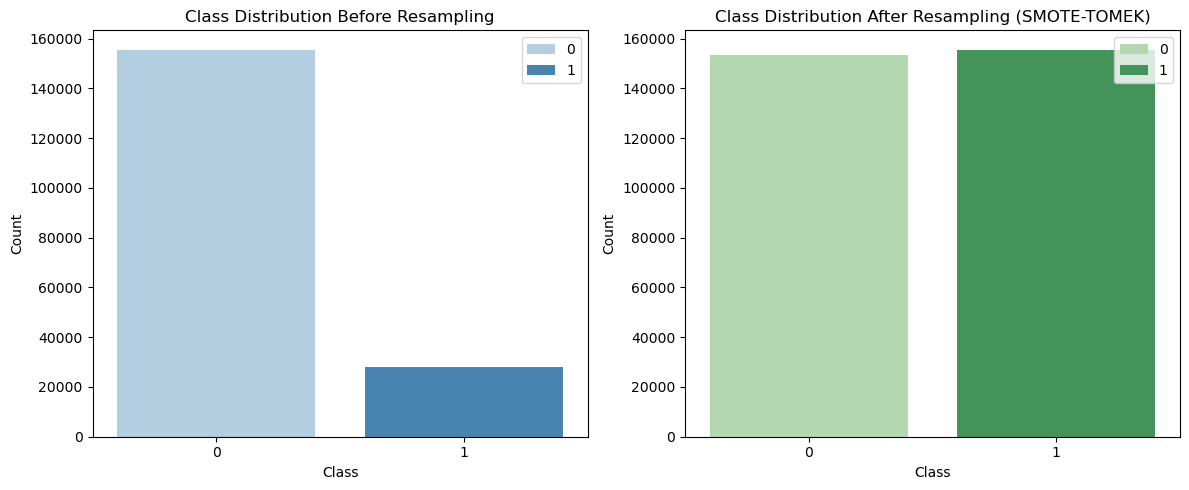

In [26]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of instances per class before and after resampling
before_counts = Counter(y_train)  # Only using training set before resampling
after_counts = Counter(y_train_resampled)  # After resampling

# Convert to lists for plotting
classes = list(before_counts.keys())
before_values = [before_counts[c] for c in classes]
after_values = [after_counts[c] for c in classes]

# Plot the class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Resampling
sns.barplot(x=classes, y=before_values, ax=axes[0], palette="Blues", hue=classes, legend=True)
axes[0].set_title("Class Distribution Before Resampling")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# After Resampling
sns.barplot(x=classes, y=after_values, ax=axes[1], palette="Greens", hue=classes, legend=True)
axes[1].set_title("Class Distribution After Resampling (SMOTE-TOMEK)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [27]:
from collections import Counter
print("Before Resampling:", Counter(y_train))
print("After Resampling :", Counter(y_train_resampled))

Before Resampling: Counter({0: 155564, 1: 28015})
After Resampling : Counter({1: 155564, 0: 153341})


## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Instantiate the KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')  

# Train the model on resampled training data
knn.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = knn.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = knn.predict(X_test)

# Evaluation on Training Data
train_accuracy_knn = accuracy_score(y_train_resampled, y_train_pred)
train_precision_knn = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_knn = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_knn = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_knn = accuracy_score(y_test, y_test_pred)
test_precision_knn = precision_score(y_test, y_test_pred, average='binary')
test_recall_knn = recall_score(y_test, y_test_pred, average='binary')  
test_f1_knn = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("KNN Classifier Results:\n")
print("Training Performance:")
print(f"Accuracy : {train_accuracy_knn:.4f}")
print(f"Precision: {train_precision_knn:.4f}")
print(f"Recall   : {train_recall_knn:.4f}")
print(f"F1 Score : {train_f1_knn:.4f}\n")

print("---------------------------------------\n")

print("Test Performance:")
print(f"Accuracy : {test_accuracy_knn:.4f}")
print(f"Precision: {test_precision_knn:.4f}")
print(f"Recall   : {test_recall_knn:.4f}")
print(f"F1 Score : {test_f1_knn:.4f}\n")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


KNN Classifier Results:

Training Performance:
Accuracy : 0.8460
Precision: 0.8185
Recall   : 0.8920
F1 Score : 0.8536

---------------------------------------

Test Performance:
Accuracy : 0.6947
Precision: 0.2682
Recall   : 0.5661
F1 Score : 0.3639


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     38813
           1       0.27      0.57      0.36      7082

    accuracy                           0.69     45895
   macro avg       0.58      0.64      0.58     45895
weighted avg       0.80      0.69      0.73     45895



## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Instantiate the Decision Tree model
dt = DecisionTreeClassifier(max_depth=25, random_state=508312)

# Train the model
dt.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = dt.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = dt.predict(X_test)

# Evaluation on Training Data
train_accuracy_dt = accuracy_score(y_train_resampled, y_train_pred)
train_precision_dt = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_dt = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_dt = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
test_precision_dt = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_dt = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_dt = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_dt = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("Decision Tree Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_dt:.4f}")
print(f"Precision: {train_precision_dt:.4f}")
print(f"Recall   : {train_recall_dt:.4f}")
print(f"F1 Score : {train_f1_dt:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_dt:.4f}")
print(f"Precision: {test_precision_dt:.4f}")
print(f"Recall_0 : {test_recall_0_dt:.4f}")
print(f"Recall_1 : {test_recall_1_dt:.4f}")
print(f"F1 Score : {test_f1_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Decision Tree Results:

Training Performance:
Accuracy : 0.9523
Precision: 0.9352
Recall   : 0.9726
F1 Score : 0.9535

---------------------------------------

Test Performance:
Accuracy : 0.7107
Precision: 0.2558
Recall_0 : 0.7568
Recall_1 : 0.4581
F1 Score : 0.3282

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82     38813
           1       0.26      0.46      0.33      7082

    accuracy                           0.71     45895
   macro avg       0.57      0.61      0.57     45895
weighted avg       0.79      0.71      0.74     45895



## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Instantiate the Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=25, random_state=508312)

# Train the model
rf.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = rf.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = rf.predict(X_test)

# Evaluation on Training Data
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred)
train_precision_rf = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_rf = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_rf = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
test_precision_rf = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_rf = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_rf = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_rf = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("Random Forest Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_rf:.4f}")
print(f"Precision: {train_precision_rf:.4f}")
print(f"Recall   : {train_recall_rf:.4f}")
print(f"F1 Score : {train_f1_rf:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_rf:.4f}")
print(f"Precision: {test_precision_rf:.4f}")
print(f"Recall_0 : {test_recall_0_rf:.4f}")
print(f"Recall_1 : {test_recall_1_rf:.4f}")
print(f"F1 Score : {test_f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Random Forest Results:

Training Performance:
Accuracy : 0.9649
Precision: 0.9488
Recall   : 0.9833
F1 Score : 0.9657

---------------------------------------

Test Performance:
Accuracy : 0.7555
Precision: 0.3157
Recall_0 : 0.8019
Recall_1 : 0.5010
F1 Score : 0.3874

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     38813
           1       0.32      0.50      0.39      7082

    accuracy                           0.76     45895
   macro avg       0.61      0.65      0.62     45895
weighted avg       0.81      0.76      0.78     45895



## AdaBoost

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Instantiate the AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.9, random_state=508312)

# Train the model
adaboost.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = adaboost.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = adaboost.predict(X_test)

# Evaluation on Training Data
train_accuracy_ada = accuracy_score(y_train_resampled, y_train_pred)
train_precision_ada = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_ada = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_ada = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_ada = accuracy_score(y_test, y_test_pred)
test_precision_ada = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_ada = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_ada = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_ada = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("AdaBoost Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_ada:.4f}")
print(f"Precision: {train_precision_ada:.4f}")
print(f"Recall   : {train_recall_ada:.4f}")
print(f"F1 Score : {train_f1_ada:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_ada:.4f}")
print(f"Precision: {test_precision_ada:.4f}")
print(f"Recall_0 : {test_recall_0_ada:.4f}")
print(f"Recall_1 : {test_recall_1_ada:.4f}")
print(f"F1 Score : {test_f1_ada:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

AdaBoost Results:

Training Performance:
Accuracy : 0.7310
Precision: 0.7212
Recall   : 0.7594
F1 Score : 0.7398

---------------------------------------

Test Performance:
Accuracy : 0.7055
Precision: 0.3071
Recall_0 : 0.7022
Recall_1 : 0.7235
F1 Score : 0.4312

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     38813
           1       0.31      0.72      0.43      7082

    accuracy                           0.71     45895
   macro avg       0.62      0.71      0.62     45895
weighted avg       0.84      0.71      0.74     45895



## CatBoost

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Instantiate the CatBoost model
catboost = CatBoostClassifier(iterations=150, learning_rate=0.5, depth=10, random_seed=508312, verbose=0)

# Train the model
catboost.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = catboost.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = catboost.predict(X_test)

# Evaluation on Training Data
train_accuracy_cat = accuracy_score(y_train_resampled, y_train_pred)
train_precision_cat = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_cat = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_cat = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_cat = accuracy_score(y_test, y_test_pred)
test_precision_cat = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_cat = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_cat = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_cat = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("CatBoost Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_cat:.4f}")
print(f"Precision: {train_precision_cat:.4f}")
print(f"Recall   : {train_recall_cat:.4f}")
print(f"F1 Score : {train_f1_cat:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_cat:.4f}")
print(f"Precision: {test_precision_cat:.4f}")
print(f"Recall_0 : {test_recall_0_cat:.4f}")
print(f"Recall_1 : {test_recall_1_cat:.4f}")
print(f"F1 Score : {test_f1_cat:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

CatBoost Results:

Training Performance:
Accuracy : 0.8370
Precision: 0.8128
Recall   : 0.8787
F1 Score : 0.8444

---------------------------------------

Test Performance:
Accuracy : 0.7219
Precision: 0.2999
Recall_0 : 0.7440
Recall_1 : 0.6011
F1 Score : 0.4002

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     38813
           1       0.30      0.60      0.40      7082

    accuracy                           0.72     45895
   macro avg       0.61      0.67      0.61     45895
weighted avg       0.82      0.72      0.75     45895



## Gradient Boosting

In [33]:
# Instantiate the model
boosting = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=508312)

# Train the model
boosting.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = boosting.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = boosting.predict(X_test)

# Evaluation on Training Data
train_accuracy_gb = accuracy_score(y_train_resampled, y_train_pred)
train_precision_gb = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_gb = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_gb = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_gb = accuracy_score(y_test, y_test_pred)
test_precision_gb = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_gb = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_gb = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_gb = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("GradientBoosting Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_gb:.4f}")
print(f"Precision: {train_precision_gb:.4f}")
print(f"Recall   : {train_recall_gb:.4f}")
print(f"F1 Score : {train_f1_gb:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_gb:.4f}")
print(f"Precision: {test_precision_gb:.4f}")
print(f"Recall_0 : {test_recall_0_gb:.4f}")
print(f"Recall_1 : {test_recall_1_gb:.4f}")
print(f"F1 Score : {test_f1_gb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

GradientBoosting Results:

Training Performance:
Accuracy : 0.8141
Precision: 0.7872
Recall   : 0.8646
F1 Score : 0.8241

---------------------------------------

Test Performance:
Accuracy : 0.7161
Precision: 0.3040
Recall_0 : 0.7280
Recall_1 : 0.6509
F1 Score : 0.4144

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     38813
           1       0.30      0.65      0.41      7082

    accuracy                           0.72     45895
   macro avg       0.61      0.69      0.61     45895
weighted avg       0.82      0.72      0.75     45895



## XGBoost

In [34]:
# Instantiate the model
xgb = XGBClassifier(n_estimators=75, learning_rate=0.7, max_depth=5, eval_metric='logloss', random_state=508312)

# Train the model
xgb.fit(X_train_resampled, y_train_resampled)

# Predictions on Training Data
y_train_pred = xgb.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = xgb.predict(X_test)

# Evaluation on Training Data
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred)
train_precision_xgb = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_xgb = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_xgb = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_xgb = accuracy_score(y_test, y_test_pred)
test_precision_xgb = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_xgb = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_xgb = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_xgb = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("XGBoot Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_xgb:.4f}")
print(f"Precision: {train_precision_xgb:.4f}")
print(f"Recall   : {train_recall_xgb:.4f}")
print(f"F1 Score : {train_f1_xgb:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_xgb:.4f}")
print(f"Precision: {test_precision_xgb:.4f}")
print(f"Recall_0 : {test_recall_0_xgb:.4f}")
print(f"Recall_1 : {test_recall_1_xgb:.4f}")
print(f"F1 Score : {test_f1_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

XGBoot Results:

Training Performance:
Accuracy : 0.7593
Precision: 0.7419
Recall   : 0.8005
F1 Score : 0.7701

---------------------------------------

Test Performance:
Accuracy : 0.7058
Precision: 0.3005
Recall_0 : 0.7100
Recall_1 : 0.6829
F1 Score : 0.4173

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     38813
           1       0.30      0.68      0.42      7082

    accuracy                           0.71     45895
   macro avg       0.61      0.70      0.61     45895
weighted avg       0.83      0.71      0.74     45895



## LightGBM

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Instantiate the model
lgb = LGBMClassifier(learning_rate=0.5, num_leaves=40, max_depth=15, random_state=42)

# Train the model
lgb.fit(X_train_resampled, y_train_resampled, eval_set=[(X_test,y_test),(X_train_resampled,y_train_resampled)], eval_metric='logloss')

# Predictions on Training Data
y_train_pred = lgb.predict(X_train_resampled)

# Predictions on Test Data
y_test_pred = lgb.predict(X_test)

# Evaluation on Training Data
train_accuracy_lgb = accuracy_score(y_train_resampled, y_train_pred)
train_precision_lgb = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_lgb = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_lgb = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_lgb = accuracy_score(y_test, y_test_pred)
test_precision_lgb = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_lgb = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_lgb = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_lgb = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("LightGBM Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_lgb:.4f}")
print(f"Precision: {train_precision_lgb:.4f}")
print(f"Recall   : {train_recall_lgb:.4f}")
print(f"F1 Score : {train_f1_lgb:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_lgb:.4f}")
print(f"Precision: {test_precision_lgb:.4f}")
print(f"Recall_0 : {test_recall_0_lgb:.4f}")
print(f"Recall_1 : {test_recall_1_lgb:.4f}")
print(f"F1 Score : {test_f1_lgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

[LightGBM] [Info] Number of positive: 155564, number of negative: 153341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 308905, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503598 -> initscore=0.014393
[LightGBM] [Info] Start training from score 0.014393


/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results:

Training Performance:
Accuracy : 0.7698
Precision: 0.7491
Recall   : 0.8162
F1 Score : 0.7812

---------------------------------------

Test Performance:
Accuracy : 0.7029
Precision: 0.2971
Recall_0 : 0.7076
Recall_1 : 0.6772
F1 Score : 0.4130

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     38813
           1       0.30      0.68      0.41      7082

    accuracy                           0.70     45895
   macro avg       0.61      0.69      0.61     45895
weighted avg       0.83      0.70      0.74     45895



### Stacking Classifier

In [36]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('ada',adaboost),
    ('gradientBoost',boosting),
    ('cat',catboost),
    ('lgb',lgb)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(),
    passthrough=True
)

# Train stacked model
stack_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred = stack_model.predict(X_train_resampled)
y_test_pred = stack_model.predict(X_test)

# Evaluation on Training Data
train_accuracy_sc = accuracy_score(y_train_resampled, y_train_pred)
train_precision_sc = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall_sc = recall_score(y_train_resampled, y_train_pred, average='binary')  
train_f1_sc = f1_score(y_train_resampled, y_train_pred, average='binary')

# Evaluation on Test Data
test_accuracy_sc = accuracy_score(y_test, y_test_pred)
test_precision_sc = precision_score(y_test, y_test_pred, average='binary')
test_recall_0_sc = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
test_recall_1_sc = recall_score(y_test, y_test_pred, average='binary', pos_label=1)
test_f1_sc = f1_score(y_test, y_test_pred, average='binary')

# Display Results
print("Stacking Results:")
print()
print("Training Performance:")
print(f"Accuracy : {train_accuracy_sc:.4f}")
print(f"Precision: {train_precision_sc:.4f}")
print(f"Recall   : {train_recall_sc:.4f}")
print(f"F1 Score : {train_f1_sc:.4f}")
print()
print("---------------------------------------")
print()
print("Test Performance:")
print(f"Accuracy : {test_accuracy_sc:.4f}")
print(f"Precision: {test_precision_sc:.4f}")
print(f"Recall_0 : {test_recall_0_sc:.4f}")
print(f"Recall_1 : {test_recall_1_sc:.4f}")
print(f"F1 Score : {test_f1_sc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

[LightGBM] [Info] Number of positive: 155564, number of negative: 153341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 308905, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503598 -> initscore=0.014393
[LightGBM] [Info] Start training from score 0.014393
[LightGBM] [Info] Number of positive: 124451, number of negative: 122673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 247124, number of used features: 21
[LightGBM] [Info

/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 124451, number of negative: 122673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 247124, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503597 -> initscore=0.014390
[LightGBM] [Info] Start training from score 0.014390


/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 124451, number of negative: 122673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 247124, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503597 -> initscore=0.014390
[LightGBM] [Info] Start training from score 0.014390


/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 124451, number of negative: 122673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 247124, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503597 -> initscore=0.014390
[LightGBM] [Info] Start training from score 0.014390


/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 124452, number of negative: 122672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 247124, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503601 -> initscore=0.014406
[LightGBM] [Info] Start training from score 0.014406


/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Stacking Results:

Training Performance:
Accuracy : 0.8404
Precision: 0.8193
Recall   : 0.8763
F1 Score : 0.8468

---------------------------------------

Test Performance:
Accuracy : 0.7329
Precision: 0.3127
Recall_0 : 0.7553
Recall_1 : 0.6101
F1 Score : 0.4135

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     38813
           1       0.31      0.61      0.41      7082

    accuracy                           0.73     45895
   macro avg       0.61      0.68      0.62     45895
weighted avg       0.82      0.73      0.76     45895



### Stacking Classifier with Hyper Parameter Tuning

In [37]:
# from sklearn.linear_model import RidgeClassifier
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# from scipy.stats import uniform, randint

# # Define base estimators
# base_estimators = [
#     ('ada', AdaBoostClassifier(random_state=508312)),
#     ('gradientBoost', GradientBoostingClassifier(random_state=42)),
#     ('cat', CatBoostClassifier(verbose=False, random_state=42))  # Remove or replace if not using CatBoost
# ]

# # Choose final estimator (alternative: RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42))
# final_estimator = RidgeClassifier()

# # Define the StackingClassifier
# stack_model = StackingClassifier(
#     estimators=base_estimators,
#     final_estimator=final_estimator,
#     passthrough=True
# )

# # Define expanded hyperparameter space
# param_grid = {
#     'passthrough': [True, False],

#     'final_estimator__alpha': uniform(0.01, 10),  # Regularization strength for RidgeClassifier

#     'gradientBoost__n_estimators': randint(100, 400),
#     'gradientBoost__learning_rate': uniform(0.05, 0.2),
#     'gradientBoost__max_depth': randint(3, 8),

#     'ada__n_estimators': randint(100, 300),
#     'ada__learning_rate': uniform(0.5, 1.5),

#     'cat__depth': randint(5, 10),
#     'cat__learning_rate': uniform(0.03, 0.15),
#     'cat__l2_leaf_reg': randint(1, 10),
# }

# # Cross-validation strategy
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=508312)

# # Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=stack_model,
#     param_distributions=param_grid,
#     n_iter=20,
#     cv=cv_strategy,
#     scoring='f1',
#     verbose=2,
#     n_jobs=-1,
#     random_state=508312
# )

# # Fit the model
# random_search.fit(X_train_resampled, y_train_resampled)

# # Best model
# best_stack_model = random_search.best_estimator_

# # Predictions
# y_train_pred = best_stack_model.predict(X_train_resampled)
# y_test_pred = best_stack_model.predict(X_test)

# # Train metrics
# train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
# train_precision = precision_score(y_train_resampled, y_train_pred)
# train_recall = recall_score(y_train_resampled, y_train_pred)
# train_f1 = f1_score(y_train_resampled, y_train_pred)

# # Test metrics
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_precision = precision_score(y_test, y_test_pred)
# test_recall_0 = recall_score(y_test, y_test_pred, pos_label=0)
# test_recall_1 = recall_score(y_test, y_test_pred, pos_label=1)
# test_f1 = f1_score(y_test, y_test_pred)

# # Output results
# print()
# print("\nBest Hyperparameters:", random_search.best_params_)
# print("Best Cross-Validation F1 Score:", random_search.best_score_)

# print("\nTraining Performance:")
# print(f"Accuracy : {train_accuracy:.4f}")
# print(f"Precision: {train_precision:.4f}")
# print(f"Recall   : {train_recall:.4f}")
# print(f"F1 Score : {train_f1:.4f}")

# print("\n---------------------------------------\n")

# print("Test Performance:")
# print(f"Accuracy  : {test_accuracy:.4f}")
# print(f"Precision : {test_precision:.4f}")
# print(f"Recall_0  : {test_recall_0:.4f}")
# print(f"Recall_1  : {test_recall_1:.4f}")
# print(f"F1 Score  : {test_f1:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_test, y_test_pred))


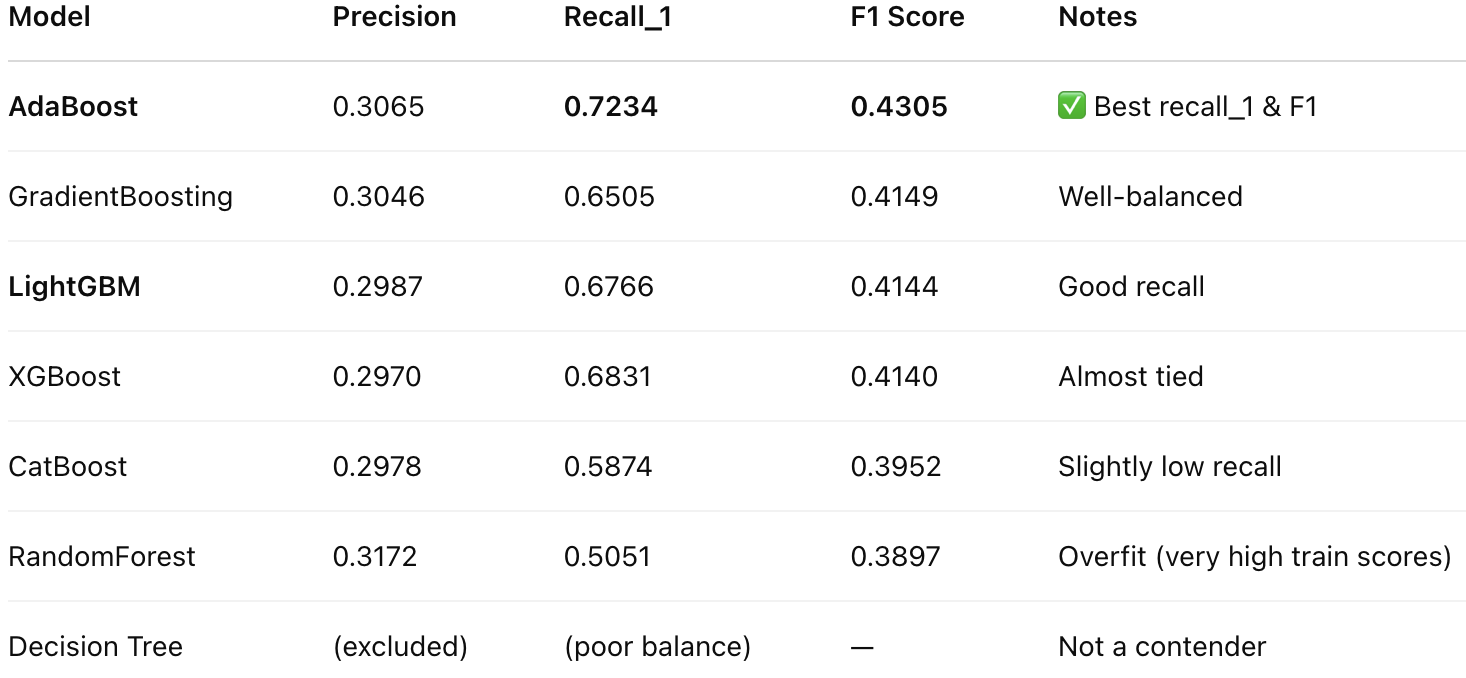

**Top Candidate: AdaBoost** 
- Best F1 score (0.4305) on the test set
- Strong recall_1 (0.7234) — the highest among all
- Precision is slightly better than others, even though still low overall
- Great generalization: training and test scores are well-aligned (no overfitting)

### Hyperparameter Tuning For AdaBoost

[I 2025-04-06 14:24:28,133] A new study created in memory with name: no-name-d6718447-56e0-497d-86da-26902806abe7
[I 2025-04-06 14:25:08,682] Trial 0 finished with value: 0.7464781367128034 and parameters: {'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 54, 'learning_rate': 0.7412731501734877}. Best is trial 0 with value: 0.7464781367128034.
[I 2025-04-06 14:26:35,646] Trial 1 finished with value: 0.7335660739981641 and parameters: {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 7, 'n_estimators': 125, 'learning_rate': 1.836635404536354}. Best is trial 0 with value: 0.7464781367128034.
[I 2025-04-06 14:28:21,028] Trial 2 finished with value: 0.7385816651516818 and parameters: {'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 242, 'learning_rate': 0.11188841270446127}. Best is trial 0 with value: 0.7464781367128034.
[I 2025-04-06 14:30:20,469] Trial 3 finished with value: 0.7498590449036421 and parameters: {'max_


Best Hyperparameters:
n_estimators     : 253
learning_rate    : 1.4708
max_depth        : 5
min_samples_split: 10
min_samples_leaf : 5
Best Threshold   : 0.504

Training Performance:
Accuracy : 0.7524
Precision: 0.7600
Recall   : 0.7429
F1 Score : 0.7513

---------------------------------------

Test Performance:
Accuracy : 0.7307
Precision: 0.3109
Recall_0 : 0.7522
Recall_1 : 0.6128
F1 Score : 0.4125

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.83     38813
           1       0.31      0.61      0.41      7082

    accuracy                           0.73     45895
   macro avg       0.61      0.68      0.62     45895
weighted avg       0.82      0.73      0.76     45895



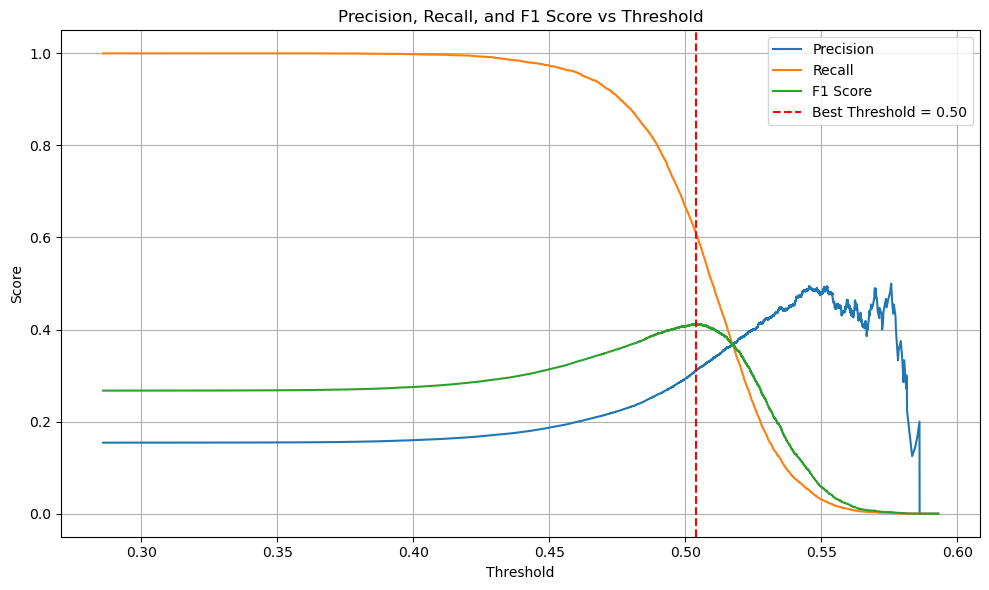

In [40]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score,
    classification_report, precision_recall_curve
)

# 🎯 Step 1: Define Optuna objective
def objective(trial):
    # Tune DecisionTreeClassifier
    base_estimator = DecisionTreeClassifier(
        max_depth=trial.suggest_int('max_depth', 1, 5),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
        random_state=42
    )

    # Tune AdaBoostClassifier
    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=trial.suggest_int('n_estimators', 50, 300),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 2.0),
        random_state=42
    )

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    return cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1').mean()

# 🧪 Step 2: Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# 🏆 Step 3: Train best model
best_params = study.best_params
best_tree = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

model = AdaBoostClassifier(
    estimator=best_tree,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)

# 🔍 Step 4: Threshold Tuning
y_probs_test = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_test)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# 🎯 Step 5: Final predictions
y_train_probs = model.predict_proba(X_train_resampled)[:, 1]
y_train_pred = (y_train_probs >= best_threshold).astype(int)
y_test_pred = (y_probs_test >= best_threshold).astype(int)

# 📊 Step 6: Evaluation

## Training
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

## Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall_0 = recall_score(y_test, y_test_pred, pos_label=0)
test_recall_1 = recall_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# 🖨️ Step 7: Output
print("\nBest Hyperparameters:")
print(f"n_estimators     : {best_params['n_estimators']}")
print(f"learning_rate    : {best_params['learning_rate']:.4f}")
print(f"max_depth        : {best_params['max_depth']}")
print(f"min_samples_split: {best_params['min_samples_split']}")
print(f"min_samples_leaf : {best_params['min_samples_leaf']}")
print(f"Best Threshold   : {best_threshold:.3f}")

print("\nTraining Performance:")
print(f"Accuracy : {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall   : {train_recall:.4f}")
print(f"F1 Score : {train_f1:.4f}")

print("\n---------------------------------------\n")

print("Test Performance:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall_0 : {test_recall_0:.4f}")
print(f"Recall_1 : {test_recall_1:.4f}")
print(f"F1 Score : {test_f1:.4f}")

print("\nClassification Report:\n", test_report)

# 📈 Step 8: Threshold Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Best Threshold = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Manual Tuning based on the above Hyperparameter Tuning

In [278]:
# Define parameter combos to test
param_sets = [
    {"n_estimators": 300, "learning_rate": 1.0, "max_depth": 4, "min_samples_split": 8, "min_samples_leaf": 3},
    {"n_estimators": 350, "learning_rate": 0.9, "max_depth": 3, "min_samples_split": 6, "min_samples_leaf": 2},
    {"n_estimators": 280, "learning_rate": 1.2, "max_depth": 3, "min_samples_split": 10, "min_samples_leaf": 5},
    {"n_estimators": 450, "learning_rate": 1.07, "max_depth": 5, "min_samples_split": 10, "min_samples_leaf": 5},
    {"n_estimators": 320, "learning_rate": 1.05, "max_depth": 5, "min_samples_split": 12, "min_samples_leaf": 5}
]

results = []

for i, params in enumerate(param_sets):
    # Create balanced base estimator
    base = DecisionTreeClassifier(
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        class_weight='balanced',
        random_state=42
    )

    # Create AdaBoost model
    model = AdaBoostClassifier(
        estimator=base,
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        random_state=508312
    )

    # Fit model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities
    y_probs_test = model.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_test)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    # Predict with best threshold
    y_train_probs = model.predict_proba(X_train_resampled)[:, 1]
    y_train_pred = (y_train_probs >= best_threshold).astype(int)
    y_test_pred = (y_probs_test >= best_threshold).astype(int)

    # Training Metrics
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_prec = precision_score(y_train_resampled, y_train_pred)
    train_rec = recall_score(y_train_resampled, y_train_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)

    # Testing Metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec0 = recall_score(y_test, y_test_pred, pos_label=0)
    test_rec1 = recall_score(y_test, y_test_pred, pos_label=1)
    test_f1 = f1_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Store results
    results.append({
        "params": params,
        "threshold": best_threshold,
        "train_f1": train_f1,
        "test_f1": test_f1,
        "test_recall_1": test_rec1,
        "test_precision": test_prec,
        "test_accuracy": test_acc
    })

    # Print results for this config
    print(f"\n🔁 Run {i+1} with Params: {params}")
    print(f"Best Threshold: {best_threshold:.3f}")
    print("\nTraining Performance:")
    print(f"Accuracy : {train_acc:.4f}")
    print(f"Precision: {train_prec:.4f}")
    print(f"Recall   : {train_rec:.4f}")
    print(f"F1 Score : {train_f1:.4f}")

    print("\nTest Performance:")
    print(f"Accuracy : {test_acc:.4f}")
    print(f"Precision: {test_prec:.4f}")
    print(f"Recall_0 : {test_rec0:.4f}")
    print(f"Recall_1 : {test_rec1:.4f}")
    print(f"F1 Score : {test_f1:.4f}")

# 🔝 Find best config by test F1 or recall_1
sorted_results = sorted(results, key=lambda x: (x["test_f1"], x["test_recall_1"]), reverse=True)
best_config = sorted_results[0]

print("\n\n🌟 Best Configuration Based on Test F1:")
print(f"Params      : {best_config['params']}")
print(f"Threshold   : {best_config['threshold']:.3f}")
print(f"F1 Score    : {best_config['test_f1']:.4f}")
print(f"Recall (1)  : {best_config['test_recall_1']:.4f}")
print(f"Precision   : {best_config['test_precision']:.4f}")
print(f"Accuracy    : {best_config['test_accuracy']:.4f}")



🔁 Run 1 with Params: {'n_estimators': 300, 'learning_rate': 1.0, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 3}
Best Threshold: 0.503

Training Performance:
Accuracy : 0.7421
Precision: 0.7353
Recall   : 0.7623
F1 Score : 0.7486

Test Performance:
Accuracy : 0.7139
Precision: 0.3081
Recall_0 : 0.7192
Recall_1 : 0.6853
F1 Score : 0.4250

🔁 Run 2 with Params: {'n_estimators': 350, 'learning_rate': 0.9, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 2}
Best Threshold: 0.529

Training Performance:
Accuracy : 0.7249
Precision: 0.7418
Recall   : 0.6961
F1 Score : 0.7182

Test Performance:
Accuracy : 0.7314
Precision: 0.3151
Recall_0 : 0.7497
Recall_1 : 0.6310
F1 Score : 0.4203

🔁 Run 3 with Params: {'n_estimators': 280, 'learning_rate': 1.2, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5}
Best Threshold: 0.504

Training Performance:
Accuracy : 0.7362
Precision: 0.7310
Recall   : 0.7535
F1 Score : 0.7421

Test Performance:
Accuracy : 0.7120
Precis

### Final Model based on Manual Tuning for ADABOOST

In [102]:
# 🔹 Build final AdaBoost model with best parameters
final_base = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=8,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=508312
)

final_model = AdaBoostClassifier(
    estimator=final_base,
    n_estimators=300,
    learning_rate=1.0,
    random_state=508312
)

# 🔹 Convert X_train_resampled to DataFrame for training
X_res_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
final_model.fit(X_res_df, y_train_resampled)

# 🔹 Convert X_test to DataFrame with correct columns
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# 🔹 Predict on test set using best threshold
best_threshold = 0.503
y_probs = final_model.predict_proba(X_test_df)[:, 1]
y_pred = (y_probs >= best_threshold).astype(int)

# 🔹 Evaluate performance
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall_0 = recall_score(y_test, y_pred, pos_label=0)
test_recall_1 = recall_score(y_test, y_pred, pos_label=1)
test_f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 🔹 Display results
print("🎯 Final Model Evaluation (Original Test Set)\n")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall_0 : {test_recall_0:.4f}")
print(f"Recall_1 : {test_recall_1:.4f}")
print(f"F1 Score : {test_f1:.4f}")
print("\nClassification Report:\n", report)


🎯 Final Model Evaluation (Original Test Set)

Accuracy : 0.7137
Precision: 0.3079
Recall_0 : 0.7189
Recall_1 : 0.6854
F1 Score : 0.4249

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.72      0.81     38813
           1       0.31      0.69      0.42      7082

    accuracy                           0.71     45895
   macro avg       0.62      0.70      0.62     45895
weighted avg       0.83      0.71      0.75     45895



### Hyperparameter tuning for LightGBM using Optuna

In [153]:
import lightgbm as lgb

# Step 1: Define the Optuna objective function
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "random_state": 508312,
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0)
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)

    y_probs = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0.3, 0.7, 100)
    f1s = [f1_score(y_test, y_probs >= t) for t in thresholds]
    return max(f1s)

# Step 2: Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Step 3: Train best LightGBM model
best_params = study.best_trial.params
print("\n🎯 Best Hyperparameters:", best_params)

final_lgbm = lgb.LGBMClassifier(
    objective="binary", metric="binary_logloss", random_state=508312, **best_params
)
final_lgbm.fit(X_train_resampled, y_train_resampled)

# Step 4: Threshold tuning on test set
y_test_probs = final_lgbm.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.3, 0.7, 100)
f1s = [f1_score(y_test, y_test_probs >= t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1s)]

# Step 5: Predict and evaluate on both train and test
y_train_probs = final_lgbm.predict_proba(X_train_resampled)[:, 1]
y_train_pred = (y_train_probs >= best_threshold).astype(int)
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# Training Metrics
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

# Test Metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec_0 = recall_score(y_test, y_test_pred, pos_label=0)
test_rec_1 = recall_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print Results
print(f"\n✅ Best Threshold: {best_threshold:.3f}")

print("\n🔹 Training Performance:")
print(f"Accuracy : {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall   : {train_rec:.4f}")
print(f"F1 Score : {train_f1:.4f}")

print("\n---------------------------------------\n")

print("🔹 Test Performance:")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall_0 : {test_rec_0:.4f}")
print(f"Recall_1 : {test_rec_1:.4f}")
print(f"F1 Score : {test_f1:.4f}")

print("\nClassification Report:\n", test_report)

[I 2025-04-06 23:15:12,518] A new study created in memory with name: no-name-de55850f-c7af-4e2f-9c13-966685752b20
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-04-06 23:15:15,050] Trial 0 finished with value: 0.4264663668548464 and parameters: {'n_estimators': 211, 'learning_rate': 0.17982678921066053, 'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 14, 'subsample': 0.9417239606031336, 'colsample_bytree': 0.5625730515079482, 'reg_alpha': 4.460175958961866, 'reg_lambda': 2.812968934970914}. Best is trial 0 with value: 0.4264663668548464.
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-04-06 23:15:17,986] Trial 1 finished with value: 0.4251377


🎯 Best Hyperparameters: {'n_estimators': 154, 'learning_rate': 0.012331659551010947, 'num_leaves': 40, 'max_depth': 4, 'min_child_samples': 32, 'subsample': 0.688929155954127, 'colsample_bytree': 0.6473689169918736, 'reg_alpha': 1.113072865068787, 'reg_lambda': 4.120566339129357}


/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



✅ Best Threshold: 0.579

🔹 Training Performance:
Accuracy : 0.7130
Precision: 0.7621
Recall   : 0.6254
F1 Score : 0.6870

---------------------------------------

🔹 Test Performance:
Accuracy : 0.7697
Precision: 0.3556
Recall_0 : 0.7995
Recall_1 : 0.6062
F1 Score : 0.4482

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85     38813
           1       0.36      0.61      0.45      7082

    accuracy                           0.77     45895
   macro avg       0.64      0.70      0.65     45895
weighted avg       0.83      0.77      0.79     45895



### Manual Tuning of LightGBM based on the above OPTUNA hyperparameter tuning

/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



✅ Best Threshold: 0.563

🔹 Training Performance:
Accuracy : 0.7303
Precision: 0.7521
Recall   : 0.6929
F1 Score : 0.7212

---------------------------------------

🔹 Test Performance:
Accuracy : 0.7481
Precision: 0.3368
Recall_0 : 0.7654
Recall_1 : 0.6531
F1 Score : 0.4444

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84     38813
           1       0.34      0.65      0.44      7082

    accuracy                           0.75     45895
   macro avg       0.63      0.71      0.64     45895
weighted avg       0.83      0.75      0.78     45895



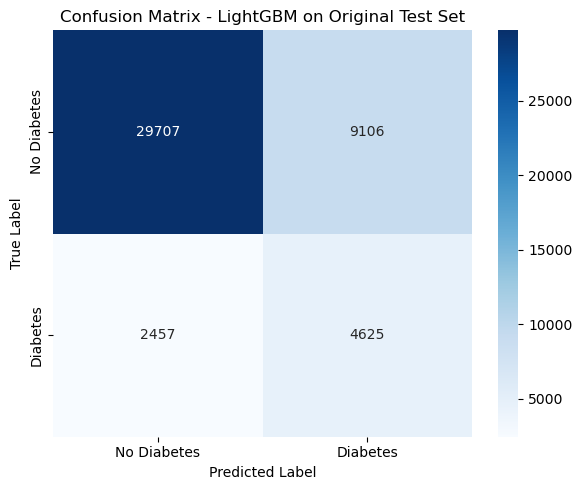

In [366]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🛠️ Step 1: Manually set LightGBM parameters
manual_params = {
    "n_estimators": 163, #95, 180
    "learning_rate": 0.025, #0.025
    "num_leaves": 60, #60, 40
    "max_depth": 4, #5
    "min_child_samples": 15,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "reg_alpha": 1.0,
    "reg_lambda": 4.0,
    "random_state": 508312,
    "objective": "binary",
    "metric": "binary_logloss"
}

# 🔁 Step 2: Train the model
manual_lgbm = lgb.LGBMClassifier(**manual_params)
manual_lgbm.fit(X_train_resampled, y_train_resampled)

# 📈 Step 3: Threshold tuning on test set
y_test_probs = manual_lgbm.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.3, 0.7, 100)
f1s = [f1_score(y_test, y_test_probs >= t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1s)]

# 🎯 Step 4: Evaluate on training + test sets
y_train_probs = manual_lgbm.predict_proba(X_train_resampled)[:, 1]
y_train_pred = (y_train_probs >= best_threshold).astype(int)
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# Training Evaluation
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

# Test Evaluation
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec_0 = recall_score(y_test, y_test_pred, pos_label=0)
test_rec_1 = recall_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# 📊 Step 5: Display results
print(f"\n✅ Best Threshold: {best_threshold:.3f}")

print("\n🔹 Training Performance:")
print(f"Accuracy : {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall   : {train_rec:.4f}")
print(f"F1 Score : {train_f1:.4f}")

print("\n---------------------------------------\n")

print("🔹 Test Performance:")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall_0 : {test_rec_0:.4f}")
print(f"Recall_1 : {test_rec_1:.4f}")
print(f"F1 Score : {test_f1:.4f}")

print("\nClassification Report:\n", test_report)


cm = confusion_matrix(y_test, y_test_pred)

# Plot using seaborn for full control
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM on Original Test Set")
plt.tight_layout()
plt.show()

### Hyperparameter Tuning for XGBoost

In [155]:
import xgboost as xgb

# Step 1: Define Optuna objective
def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "random_state": 508312,
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)

    y_probs = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0.3, 0.7, 100)
    f1s = [f1_score(y_test, y_probs >= t) for t in thresholds]
    return max(f1s)

# Step 2: Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Step 3: Train final model with best params
best_params = study.best_trial.params
print("\n🎯 Best Hyperparameters:", best_params)

final_xgb = xgb.XGBClassifier(
    objective="binary:logistic", eval_metric="logloss",
    use_label_encoder=False, random_state=508312, **best_params
)
final_xgb.fit(X_train_resampled, y_train_resampled)

# Step 4: Threshold tuning on test set
y_test_probs = final_xgb.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.3, 0.7, 100)
f1s = [f1_score(y_test, y_test_probs >= t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1s)]

# Step 5: Train + test predictions
y_train_probs = final_xgb.predict_proba(X_train_resampled)[:, 1]
y_train_pred = (y_train_probs >= best_threshold).astype(int)
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# 🔹 Train Evaluation
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

# 🔹 Test Evaluation
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec_0 = recall_score(y_test, y_test_pred, pos_label=0)
test_rec_1 = recall_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# 🔹 Print Results
print(f"\n✅ Best Threshold: {best_threshold:.3f}")

print("\n🔹 Training Performance:")
print(f"Accuracy : {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall   : {train_rec:.4f}")
print(f"F1 Score : {train_f1:.4f}")

print("\n---------------------------------------\n")

print("🔹 Test Performance:")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall_0 : {test_rec_0:.4f}")
print(f"Recall_1 : {test_rec_1:.4f}")
print(f"F1 Score : {test_f1:.4f}")

print("\nClassification Report:\n", test_report)

[I 2025-04-06 23:26:11,814] A new study created in memory with name: no-name-eebb8fee-663a-4afa-a4cf-5994eb1a7493
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:26:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-04-06 23:26:14,147] Trial 0 finished with value: 0.4180161943319838 and parameters: {'n_estimators': 267, 'max_depth': 8, 'learning_rate': 0.1505294764685276, 'subsample': 0.9739787319168784, 'colsample_bytree': 0.6806362392149359, 'reg_alpha': 2.682543824187494, 'reg_lambda': 3.3056788412836466, 'min_child_weight': 2}. Best is trial 0 with value: 0.4180161943319838.
/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:26:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWar


🎯 Best Hyperparameters: {'n_estimators': 204, 'max_depth': 5, 'learning_rate': 0.010868060288988509, 'subsample': 0.8254298527746229, 'colsample_bytree': 0.5598516552965486, 'reg_alpha': 4.39303534190846, 'reg_lambda': 4.978227852490376, 'min_child_weight': 9}

✅ Best Threshold: 0.575

🔹 Training Performance:
Accuracy : 0.7222
Precision: 0.7634
Recall   : 0.6496
F1 Score : 0.7019

---------------------------------------

🔹 Test Performance:
Accuracy : 0.7645
Precision: 0.3498
Recall_0 : 0.7921
Recall_1 : 0.6131
F1 Score : 0.4455

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     38813
           1       0.35      0.61      0.45      7082

    accuracy                           0.76     45895
   macro avg       0.63      0.70      0.65     45895
weighted avg       0.83      0.76      0.79     45895



### Manual Tuning for XGBoost

/Users/namithabhaskar/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Best Threshold: 0.555

🔹 Training Performance:
Accuracy : 0.7360
Precision: 0.7498
Recall   : 0.7139
F1 Score : 0.7314

---------------------------------------

🔹 Test Performance:
Accuracy : 0.7408
Precision: 0.3304
Recall_0 : 0.7551
Recall_1 : 0.6622
F1 Score : 0.4409

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83     38813
           1       0.33      0.66      0.44      7082

    accuracy                           0.74     45895
   macro avg       0.63      0.71      0.64     45895
weighted avg       0.83      0.74      0.77     45895



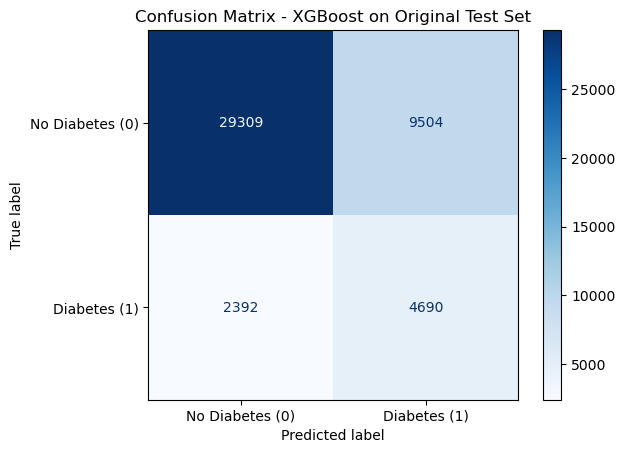

In [377]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Define manual hyperparameters
manual_xgb_params = {
    "n_estimators": 128,
    "max_depth": 5,
    "learning_rate": 0.04,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "reg_alpha": 1.0,
    "reg_lambda": 4.0,
    "min_child_weight": 5,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "use_label_encoder": False,
    "random_state": 508312
}

# Step 2: Train XGBoost model with manual parameters
manual_xgb = xgb.XGBClassifier(**manual_xgb_params)
manual_xgb.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict probabilities and tune threshold
y_test_probs = manual_xgb.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.3, 0.7, 100)
f1s = [f1_score(y_test, y_test_probs >= t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1s)]

# Step 4: Evaluate on training and test sets
y_train_probs = manual_xgb.predict_proba(X_train_resampled)[:, 1]
y_train_pred = (y_train_probs >= best_threshold).astype(int)
y_test_pred = (y_test_probs >= best_threshold).astype(int)

# Training metrics
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

# Test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec0 = recall_score(y_test, y_test_pred, pos_label=0)
test_rec1 = recall_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print results
print(f"\n✅ Best Threshold: {best_threshold:.3f}")

print("\n🔹 Training Performance:")
print(f"Accuracy : {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall   : {train_rec:.4f}")
print(f"F1 Score : {train_f1:.4f}")

print("\n---------------------------------------\n")

print("🔹 Test Performance:")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall_0 : {test_rec0:.4f}")
print(f"Recall_1 : {test_rec1:.4f}")
print(f"F1 Score : {test_f1:.4f}")

print("\nClassification Report:\n", test_report)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)  # y_test_pred should be from the current model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes (0)", "Diabetes (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost on Original Test Set")  # Update [Model Name]
plt.show()

### Testing on the Balanced Dataset to see how model performs 

In [81]:
baldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [82]:
baldf.shape

(70692, 22)

In [83]:
baldf.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [84]:
baldf.duplicated().sum()

1635

In [85]:
baldf.drop_duplicates(inplace=True)

In [86]:
baldf.duplicated().sum()

0

In [87]:
baldf1 = baldf

In [88]:
baldf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

In [89]:
# AGE 
# Define the mapping from 13 categories to 3 integer groups
age_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1,  # Categories 1-4 → 1 (18-39)
    5: 2, 6: 2, 7: 2, 8: 2, 9: 2,  # Categories 5-9 → 2 (40-64)
    10: 3, 11: 3, 12: 3, 13: 3  # Categories 10-13 → 3 (65-99)
}

# Apply the mapping to create a new column
baldf1["Age_Categorized"] = baldf1["Age"].map(age_mapping)

# Display the counts of new categories
print(baldf1["Age_Categorized"].value_counts())

Age_Categorized
2    32751
3    29271
1     7035
Name: count, dtype: int64


In [90]:
# EDUCATION
# Define the mapping for Education categories
education_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1,  # Combine categories 1-4 → 1 (Up to High School)
    5: 2,  # Keep category 5 → 2 (Some College)
    6: 3   # Keep category 6 → 3 (College Graduate)
}

# Apply the mapping to create a new column
baldf1["Education_Categorized"] = baldf1["Education"].map(education_mapping)

# Display the counts of new categories
print(baldf1["Education_Categorized"].value_counts())

Education_Categorized
3    24646
1    24566
2    19845
Name: count, dtype: int64


In [91]:
# INCOME
# Define the mapping for Education categories
income_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1,  # Combine categories 1-5 → 1 ($0 - $35,000)
    6: 2, 7: 2,  # Keep category 6-7 → 2 ($35,000 - $75,000)
    8: 3   # Keep category 8 → 3 (more than $75,000)
}

# Apply the mapping to create a new column
baldf1["Income_Categorized"] = baldf1["Income"].map(income_mapping)

# Display the counts of new categories
print(baldf1["Income_Categorized"].value_counts())

Income_Categorized
1    28281
2    21469
3    19307
Name: count, dtype: int64


In [92]:
baldf1 = baldf1.drop(columns=['Age','Education','Income'])

In [93]:
baldf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Diabetes_binary        69057 non-null  float64
 1   HighBP                 69057 non-null  float64
 2   HighChol               69057 non-null  float64
 3   CholCheck              69057 non-null  float64
 4   BMI                    69057 non-null  float64
 5   Smoker                 69057 non-null  float64
 6   Stroke                 69057 non-null  float64
 7   HeartDiseaseorAttack   69057 non-null  float64
 8   PhysActivity           69057 non-null  float64
 9   Fruits                 69057 non-null  float64
 10  Veggies                69057 non-null  float64
 11  HvyAlcoholConsump      69057 non-null  float64
 12  AnyHealthcare          69057 non-null  float64
 13  NoDocbcCost            69057 non-null  float64
 14  GenHlth                69057 non-null  float64
 15  MentHlt

In [104]:
baldf1 = baldf1.astype(int)

In [106]:
baldf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Diabetes_binary        69057 non-null  int64
 1   HighBP                 69057 non-null  int64
 2   HighChol               69057 non-null  int64
 3   CholCheck              69057 non-null  int64
 4   BMI                    69057 non-null  int64
 5   Smoker                 69057 non-null  int64
 6   Stroke                 69057 non-null  int64
 7   HeartDiseaseorAttack   69057 non-null  int64
 8   PhysActivity           69057 non-null  int64
 9   Fruits                 69057 non-null  int64
 10  Veggies                69057 non-null  int64
 11  HvyAlcoholConsump      69057 non-null  int64
 12  AnyHealthcare          69057 non-null  int64
 13  NoDocbcCost            69057 non-null  int64
 14  GenHlth                69057 non-null  int64
 15  MentHlth               69057 non-null  in

In [107]:
bX = baldf1.drop(columns=['Diabetes_binary']) 
by = baldf1['Diabetes_binary']  

In [108]:
bX.shape

(69057, 21)

In [109]:
by.shape

(69057,)

In [110]:
Counter(by)

Counter({1: 35097, 0: 33960})

### Testing AdaBoost on Balanced Data

In [133]:
# 🔹 Step 1: Match features with training data
X_bal = baldf[X_train.columns]
y_bal = baldf["Diabetes_binary"]

# 🔹 Step 2: Predict using the trained final model
y_probs_bal = final_model.predict_proba(X_bal)[:, 1]
y_pred_bal = (y_probs_bal >= 0.414).astype(int)

# 🔹 Step 3: Evaluate performance
acc = accuracy_score(y_bal, y_pred_bal)
prec = precision_score(y_bal, y_pred_bal)
rec0 = recall_score(y_bal, y_pred_bal, pos_label=0)
rec1 = recall_score(y_bal, y_pred_bal, pos_label=1)
f1 = f1_score(y_bal, y_pred_bal)
report = classification_report(y_bal, y_pred_bal)

# 🔹 Step 4: Display results
print("📊 Final Model Evaluation on Balanced Test Set\n")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall_0 : {rec0:.4f}")
print(f"Recall_1 : {rec1:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", report)

📊 Final Model Evaluation on Balanced Test Set

Accuracy : 0.5507
Precision: 0.5463
Recall_0 : 0.4138
Recall_1 : 0.6831
F1 Score : 0.6071

Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.41      0.48     33960
         1.0       0.55      0.68      0.61     35097

    accuracy                           0.55     69057
   macro avg       0.55      0.55      0.54     69057
weighted avg       0.55      0.55      0.54     69057



In [112]:
print("Predicted class counts:", np.unique(y_pred_bal, return_counts=True))

Predicted class counts: (array([0, 1]), array([68424,   633]))


In [113]:
print("Min prob:", y_probs_bal.min())
print("Max prob:", y_probs_bal.max())
print("Median prob:", np.median(y_probs_bal))

Min prob: 0.3529622023686239
Max prob: 0.5104682857173111
Median prob: 0.42523749269973066


### feature importance of AdaBoost

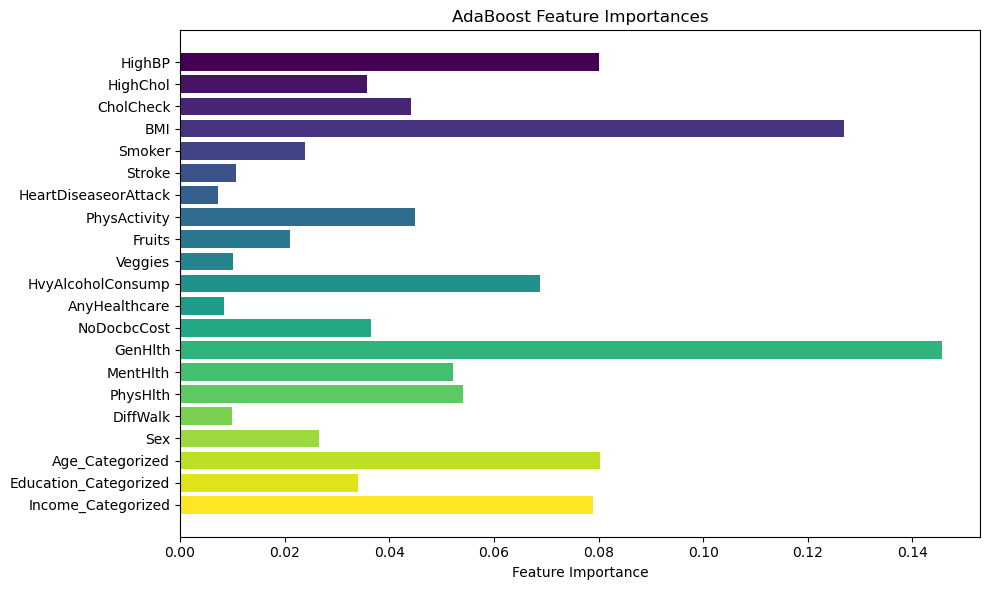

In [150]:
import matplotlib.pyplot as plt

# Feature importance from AdaBoost
importances = final_model.feature_importances_
features = X_train.columns

# Colors (pick your favorite colormap)
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color=colors)
plt.xlabel("Feature Importance")
plt.title("AdaBoost Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Testing lightGBM (optuna) of Balanced Data

In [154]:
# 🔹 Step 1: Match features with training data
X_bal = baldf[X_train.columns]
y_bal = baldf["Diabetes_binary"]

# 🔹 Step 2: Predict using the trained final model
y_probs_bal = final_lgbm.predict_proba(X_bal)[:, 1]
y_pred_bal = (y_probs_bal >= 0.579).astype(int)

# 🔹 Step 3: Evaluate performance
acc = accuracy_score(y_bal, y_pred_bal)
prec = precision_score(y_bal, y_pred_bal)
rec0 = recall_score(y_bal, y_pred_bal, pos_label=0)
rec1 = recall_score(y_bal, y_pred_bal, pos_label=1)
f1 = f1_score(y_bal, y_pred_bal)
report = classification_report(y_bal, y_pred_bal)

# 🔹 Step 4: Display results
print("📊 Final Model Evaluation on Balanced Test Set\n")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall_0 : {rec0:.4f}")
print(f"Recall_1 : {rec1:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", report)

📊 Final Model Evaluation on Balanced Test Set

Accuracy : 0.6742
Precision: 0.6783
Recall_0 : 0.6655
Recall_1 : 0.6826
F1 Score : 0.6804

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67     33960
         1.0       0.68      0.68      0.68     35097

    accuracy                           0.67     69057
   macro avg       0.67      0.67      0.67     69057
weighted avg       0.67      0.67      0.67     69057



### Testing manual light gbm with balanced data

In [284]:
# 🔹 Step 1: Match features with training data
X_bal = baldf[X_train.columns]
y_bal = baldf["Diabetes_binary"]

# 🔹 Step 2: Predict using the trained final model
y_probs_bal = manual_lgbm.predict_proba(X_bal)[:, 1]
y_pred_bal = (y_probs_bal >= 0.5).astype(int)

# 🔹 Step 3: Evaluate performance
acc = accuracy_score(y_bal, y_pred_bal)
prec = precision_score(y_bal, y_pred_bal)
rec0 = recall_score(y_bal, y_pred_bal, pos_label=0)
rec1 = recall_score(y_bal, y_pred_bal, pos_label=1)
f1 = f1_score(y_bal, y_pred_bal)
report = classification_report(y_bal, y_pred_bal)

# 🔹 Step 4: Display results
print("📊 Final Model Evaluation on Balanced Test Set\n")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall_0 : {rec0:.4f}")
print(f"Recall_1 : {rec1:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", report)

📊 Final Model Evaluation on Balanced Test Set

Accuracy : 0.6677
Precision: 0.6665
Recall_0 : 0.6418
Recall_1 : 0.6929
F1 Score : 0.6794

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.64      0.66     33960
         1.0       0.67      0.69      0.68     35097

    accuracy                           0.67     69057
   macro avg       0.67      0.67      0.67     69057
weighted avg       0.67      0.67      0.67     69057



### Testing XGBoost with Balanced Data

In [156]:
# 🔹 Step 1: Match features with training data
X_bal = baldf[X_train.columns]
y_bal = baldf["Diabetes_binary"]

# 🔹 Step 2: Predict using the trained final model
y_probs_bal = final_xgb.predict_proba(X_bal)[:, 1]
y_pred_bal = (y_probs_bal >= 0.579).astype(int)

# 🔹 Step 3: Evaluate performance
acc = accuracy_score(y_bal, y_pred_bal)
prec = precision_score(y_bal, y_pred_bal)
rec0 = recall_score(y_bal, y_pred_bal, pos_label=0)
rec1 = recall_score(y_bal, y_pred_bal, pos_label=1)
f1 = f1_score(y_bal, y_pred_bal)
report = classification_report(y_bal, y_pred_bal)

# 🔹 Step 4: Display results
print("📊 Final Model Evaluation on Balanced Test Set\n")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall_0 : {rec0:.4f}")
print(f"Recall_1 : {rec1:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", report)

📊 Final Model Evaluation on Balanced Test Set

Accuracy : 0.6674
Precision: 0.6819
Recall_0 : 0.6877
Recall_1 : 0.6478
F1 Score : 0.6644

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.69      0.67     33960
         1.0       0.68      0.65      0.66     35097

    accuracy                           0.67     69057
   macro avg       0.67      0.67      0.67     69057
weighted avg       0.67      0.67      0.67     69057



### Testing manual XGBoost model with Balanced data

In [311]:
# 🔹 Step 1: Match features with training data
X_bal = baldf[X_train.columns]
y_bal = baldf["Diabetes_binary"]

# 🔹 Step 2: Predict using the trained final model
y_probs_bal = manual_xgb.predict_proba(X_bal)[:, 1]
y_pred_bal = (y_probs_bal >= 0.555).astype(int)

# 🔹 Step 3: Evaluate performance
acc = accuracy_score(y_bal, y_pred_bal)
prec = precision_score(y_bal, y_pred_bal)
rec0 = recall_score(y_bal, y_pred_bal, pos_label=0)
rec1 = recall_score(y_bal, y_pred_bal, pos_label=1)
f1 = f1_score(y_bal, y_pred_bal)
report = classification_report(y_bal, y_pred_bal)

# 🔹 Step 4: Display results
print("📊 Final Model Evaluation on Balanced Test Set\n")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall_0 : {rec0:.4f}")
print(f"Recall_1 : {rec1:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", report)

📊 Final Model Evaluation on Balanced Test Set

Accuracy : 0.6601
Precision: 0.6482
Recall_0 : 0.5939
Recall_1 : 0.7242
F1 Score : 0.6841

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.59      0.63     33960
         1.0       0.65      0.72      0.68     35097

    accuracy                           0.66     69057
   macro avg       0.66      0.66      0.66     69057
weighted avg       0.66      0.66      0.66     69057



### SHAP for LightGBM model

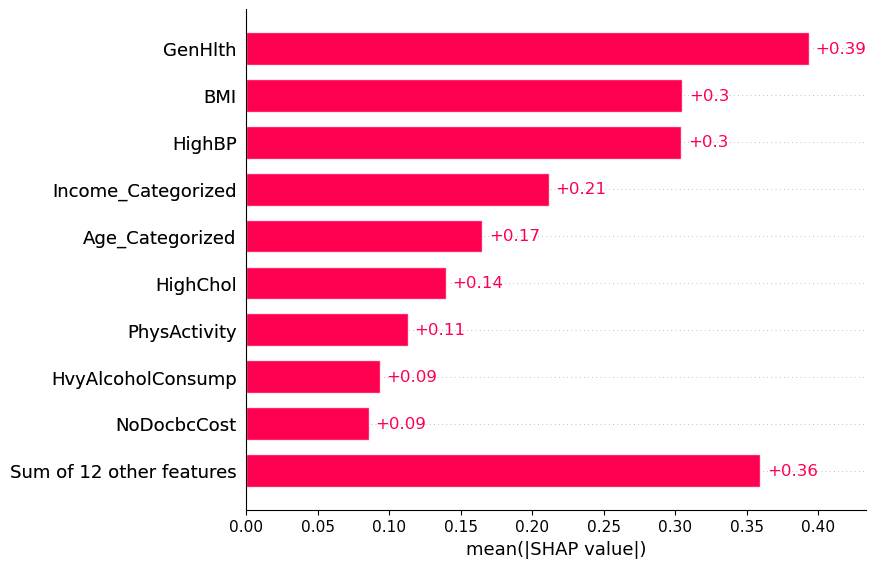

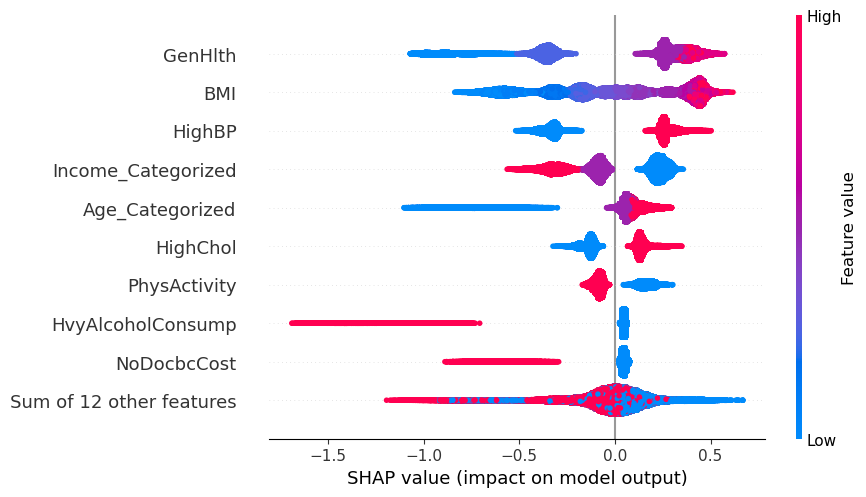

In [312]:
import shap

# Step 1: Prepare training data as DataFrame
X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Step 2: Use TreeExplainer (works perfectly with LightGBM)
# explainer = shap.TreeExplainer(final_lgbm)
explainer = shap.TreeExplainer(manual_lgbm)

# Step 3: Compute SHAP values
shap_values = explainer(X_train_df)

# Step 4: Summary Plot (Bar)
# shap.summary_plot(shap_values, X_train_df, plot_type="bar", max_display=15)

shap.plots.bar(shap_values)

# Step 5: Beeswarm Plot
# shap.summary_plot(shap_values, X_train_df, max_display=15)

shap.plots.beeswarm(shap_values)

### 🔷 1. **Bar Plot – Global Feature Importance**

> Shows which features had the **biggest average impact** on the model's predictions.

#### 🔝 Top Contributors:
- **GenHlth** : Most impactful feature — poor general health strongly pushes predictions toward diabetes
- **HighBP** : High blood pressure is highly predictive of diabetes
- **BMI** : A high BMI increases the likelihood of being classified as diabetic
- **Income_Categorized** : Lower income brackets may correlate with higher risk
- **Age_Categorized** : Older individuals have higher SHAP values (greater impact)

🧠 Interpretation:
> The model learned health-related and socio-economic features are the most important drivers of diabetes classification.

---

### 🌈 2. **Beeswarm Plot – Distribution of SHAP Impacts**

> Shows how individual feature values (high or low) affect each prediction.

#### Key Observations:
- **GenHlth (General Health)**: Red = poor health → pushes prediction toward diabetes. Blue (good health) lowers risk.
- **HighBP**: High blood pressure (red) increases SHAP value → model leans toward class 1.
- **BMI**: Higher BMI (red) increases risk; lower BMI (blue) reduces it.
- **Income & Age**: Lower income and older age generally push predictions up.

🧪 We also get a sense of **variability** — e.g., even for the same BMI or income level, the effect can vary across individuals.

---

### 💡 Final SHAP Takeaway

> SHAP confirms that the model is **aligned with medical expectations** — general health, blood pressure, BMI, and income are intuitive and explainable indicators of diabetes risk.

### SHAP for XGBoost

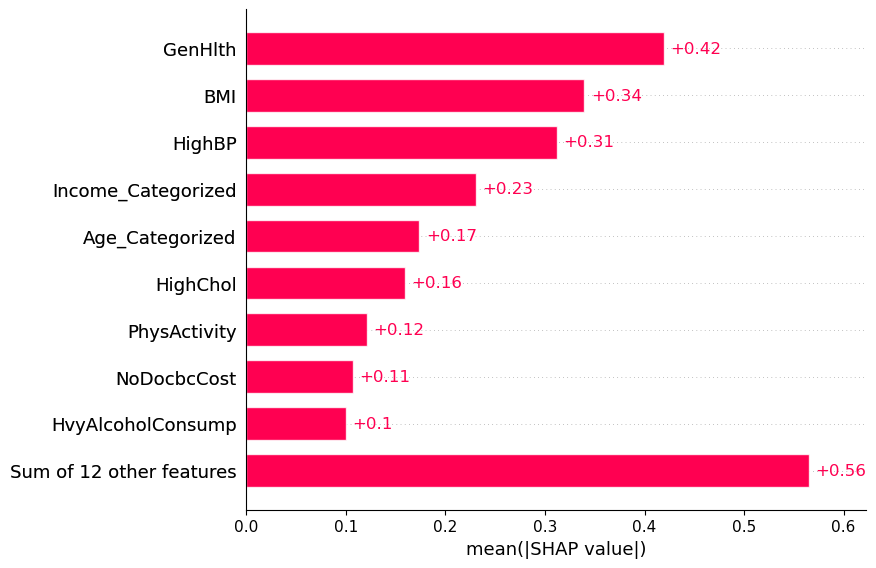

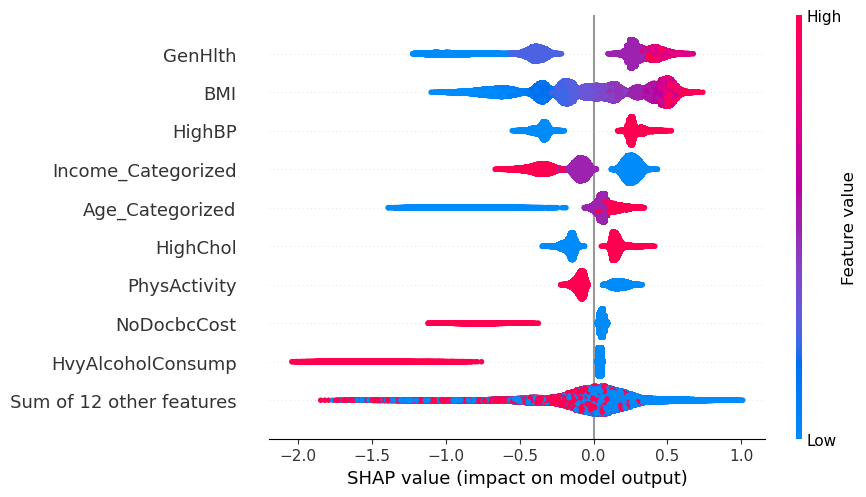

In [313]:
import shap

# Step 1: Prepare training data as DataFrame
X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Step 2: Use TreeExplainer (works perfectly with XGB)
explainer = shap.TreeExplainer(manual_xgb)

# Step 3: Compute SHAP values
shap_values = explainer(X_train_df)

# Step 4: Summary Plot (Bar)
# shap.summary_plot(shap_values, X_train_df, plot_type="bar", max_display=15)

shap.plots.bar(shap_values)

# Step 5: Beeswarm Plot
# shap.summary_plot(shap_values, X_train_df, max_display=15)

shap.plots.beeswarm(shap_values)

In [316]:
import joblib

In [317]:
joblib.dump(final_model, "AdaBoostManual_model.pkl")

['AdaBoostManual_model.pkl']

In [318]:
# LightGBM Manual Tuned Model
joblib.dump(manual_lgbm, "LightGBM_Manual_model.pkl")

['LightGBM_Manual_model.pkl']

In [319]:
# XGBoost Manual Tuned Model
joblib.dump(manual_xgb, "XGBoost_Manual_model.pkl")

['XGBoost_Manual_model.pkl']

In [335]:
print(X_train.columns.tolist())

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age_Categorized', 'Education_Categorized', 'Income_Categorized']
